<a href="https://colab.research.google.com/github/Israwss/Datos-Masivos-II/blob/main/DMII_U1_2_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos Masivos II

## Ciencia de datos - IIMAS


### Unidad 1. Reducción de dimensionalidad

#### 1.2. Singular Values Descomposition



![picture](https://drive.google.com/uc?id=1WgMONjoiJy-dDKnvkpB-_-ra-dBgwhuy)

Dada una matriz $A$ de tamaño $mxn$, la descomposición de valores singulares es de la forma

$$A=UΣV^T$$
Donde:

- $U$ es una matriz ortogonal de tamaño $mxm$, cuyas columnas son los vectores singulares izquierdos de $A$.
- $Σ$ es una matriz diagonal de tamaño $mxn$, con elementos no negativos, conocidos como valores singulares de $A$.
- $V^T$ es la transpuesta de la matriz ortogonal $V$, de tamaño $nxn$, cuyas columnas son los vectores singulares derechos de $A$.


Fuente: https://github.com/blancavazquez/CursoDatosMasivosII

## 1) Descomposición de valores singulares de la matriz A
Dada una matriz A calcular su descomposición en valores singulares y posteriormente reconstruirla.

In [ ]:
#Carga de bibliotecas de numpy y scipy
from numpy import array
from scipy.linalg import svd
#Definimos la matriz A
A = array([[5,1],[2,-2],[4,9]])
print(A)

[[ 5  1]
 [ 2 -2]
 [ 4  9]]


In [ ]:
#Descomposición de la matriz A
U, Sigma, VT = svd(A)
print("Matriz U:\n",U)
print("Matriz Sigma: \n",Sigma)
print("Matriz VT:\n",VT)

Matriz U:
 [[ 0.32743953  0.78898129 -0.51989603]
 [-0.06818241  0.56852442  0.81983605]
 [ 0.94240889 -0.23299896  0.23995201]]
Matriz Sigma: 
 [10.38265511  4.81668691]
Matriz VT:
 [[ 0.50762241  0.86157965]
 [ 0.86157965 -0.50762241]]


### Reconstrucción de la matriz original

In [ ]:
# Reconstruir la matriz A, a partir de las matrices U, Sigma y VT.
from numpy import array
from scipy.linalg import svd
from numpy import diag
from numpy import dot
from numpy import zeros

# Creamos una matriz diagonal de tamano m x n
sigma_diagonal = zeros((A.shape[0], A.shape[1]))
print(sigma_diagonal)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
# Llenamos la matriz sigma_diagonal con los valores singulares (Sigma)
sigma_diagonal[:A.shape[1], :A.shape[1]] = diag(Sigma)
print(sigma_diagonal)

[[10.38265511  0.        ]
 [ 0.          4.81668691]
 [ 0.          0.        ]]


In [ ]:
#Reconstruimos la matriz original
B = U.dot(sigma_diagonal.dot(VT))
print("Matriz reconstruida a partir de la factorización de A:\n", B)

Matriz reconstruida a partir de la factorización de A:
 [[ 5.  1.]
 [ 2. -2.]
 [ 4.  9.]]


## 2) Compresión de imágenes


In [ ]:
#https://github.com/luisguiserrano/singular_value_decomposition
#Carga de bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image
from scipy.linalg import svd
from matplotlib.pyplot import imshow

In [ ]:
# Definimos una matriz A que representa una imagen en formato binario (0s y 1s)
A= np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
print(A)

[[0 1 1 0 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]]


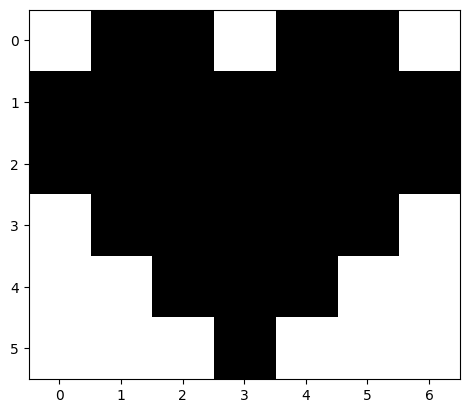

In [ ]:
# Parámetros para la visualización de imágenes
vmin = 0  # Valor mínimo para la escala de colores
vmax = 1  # Valor máximo para la escala de colores
image_bias = 1  # Sesgo para la visualización, utilizado para invertir los colores (blanco y negro)
n = len(A)  # Número de filas (y columnas) de la matriz A

# Mostramos la imagen correspondiente a la matriz A con colores invertidos (blanco y negro)
plt.imshow(image_bias - A, cmap='gray', vmin=vmin, vmax=vmax)


In [ ]:
# Realizamos la Descomposición en Valores Singulares (SVD) de la matriz A
U, Sigma, VT = svd(A)

# Imprimimos la matriz U (matriz ortogonal) redondeada a 2 decimales
print(np.round(U, 2))
print()

# Convertimos Sigma, que es un vector, en una matriz diagonal y la imprimimos
sigma = np.diag(Sigma)
print(np.round(sigma, 2))
print()

# Imprimimos la matriz VT (transpuesta de la matriz ortogonal V) redondeada a 2 decimales
print(np.round(VT, 2))

[[ 0.36 -0.    0.73 -0.05 -0.26  0.51]
 [ 0.54  0.35 -0.27 -0.08  0.63  0.32]
 [ 0.54  0.35 -0.27 -0.08 -0.63 -0.32]
 [ 0.45 -0.35  0.27  0.52  0.26 -0.51]
 [ 0.28 -0.71 -0.18 -0.62  0.    0.  ]
 [ 0.08 -0.35 -0.46  0.57 -0.26  0.51]]

[[4.74 0.   0.   0.   0.   0.  ]
 [0.   1.41 0.   0.   0.   0.  ]
 [0.   0.   1.41 0.   0.   0.  ]
 [0.   0.   0.   0.73 0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]]

[[ 0.23  0.4   0.46  0.4   0.46  0.4   0.23]
 [ 0.5   0.25 -0.25 -0.5  -0.25  0.25  0.5 ]
 [-0.39  0.32  0.19 -0.65  0.19  0.32 -0.39]
 [-0.22  0.42 -0.44  0.42 -0.44  0.42 -0.22]
 [-0.68  0.19 -0.02 -0.    0.02 -0.19  0.68]
 [ 0.   -0.06 -0.7   0.    0.7   0.06 -0.  ]
 [-0.19 -0.68  0.06  0.   -0.06  0.68  0.19]]


Información en que aporta cada vector singular:


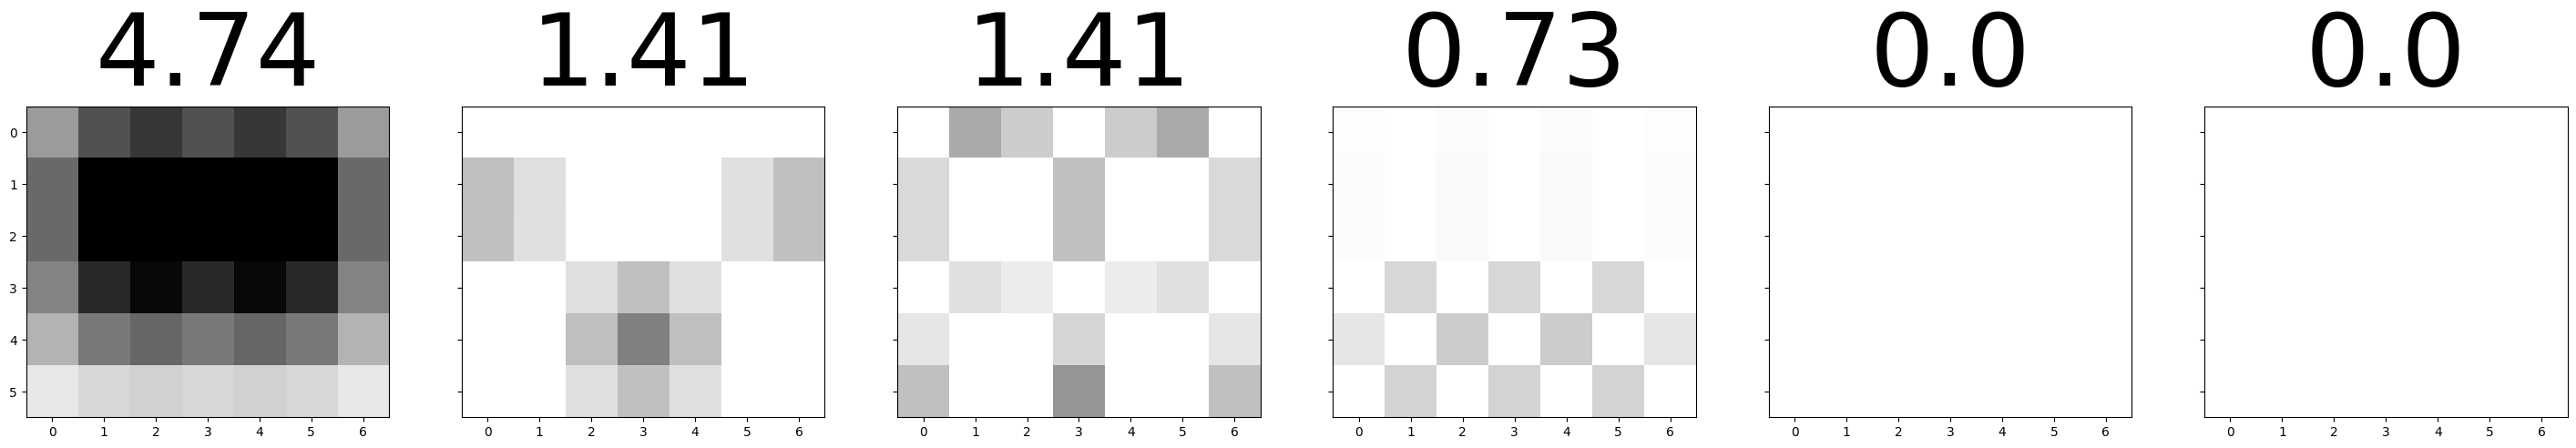

Concatenado de la información:


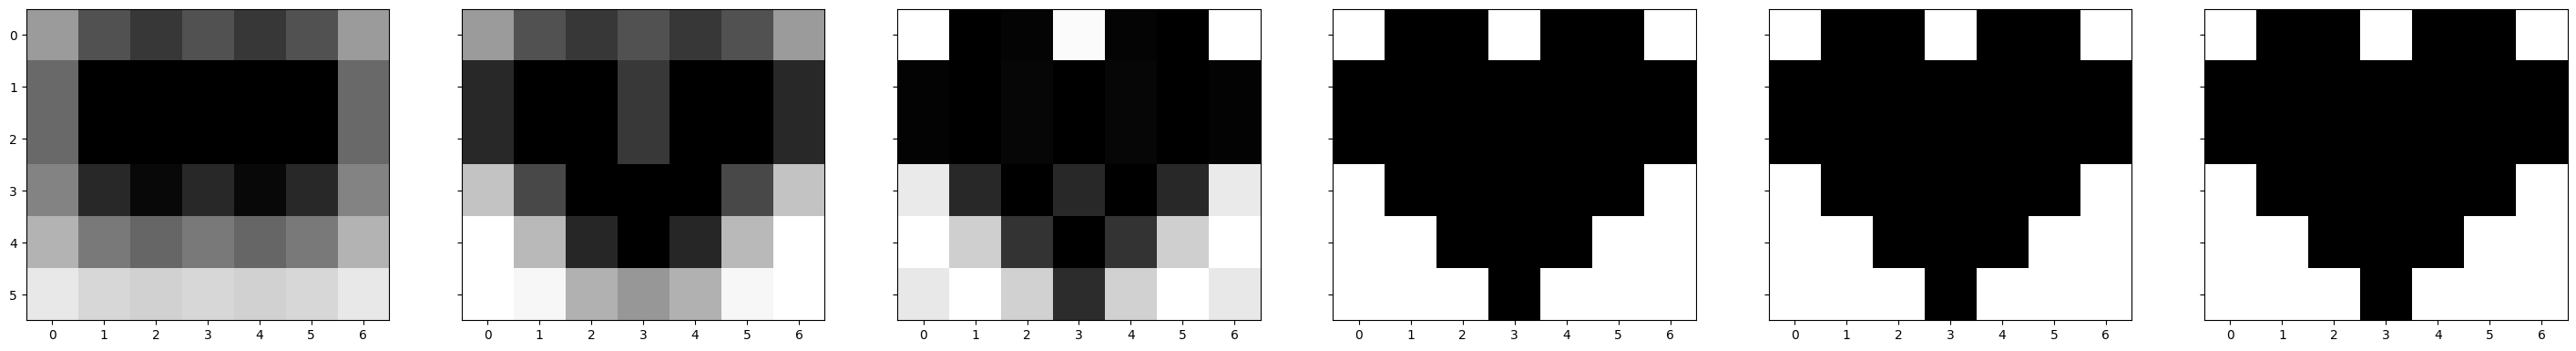

In [ ]:
# Inicializamos una lista para almacenar imágenes reconstruidas a partir de los vectores singulares
imgs = []
for i in range(n):
    # Calculamos la contribución de cada componente singular a la imagen original
    imgs.append(Sigma[i] * np.outer(U[:, i], VT[i]))

# Inicializamos una lista para almacenar las imágenes combinadas paso a paso
combined_imgs = []
for i in range(n):
    # Sumamos las primeras 'i+1' componentes para ver la reconstrucción progresiva de la imagen
    img = sum(imgs[:i+1])
    combined_imgs.append(img)

# Creamos una figura con múltiples subplots para visualizar cada componente singular
fig, axes = plt.subplots(figsize=(n * n, n), nrows=1, ncols=n, sharex=True, sharey=True)

print('Información en que aporta cada vector singular:')
for num, ax in zip(range(n), axes):
    # Mostramos cada componente singular como una imagen
    ax.imshow(image_bias - imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    # Mostramos el valor singular correspondiente como título del subplot
    ax.set_title(np.round(Sigma[num], 2), fontsize=80)
plt.show()

# Creamos otra figura para mostrar la reconstrucción progresiva de la imagen
fig, axes = plt.subplots(figsize=(n * n, n), nrows=1, ncols=n, sharex=True, sharey=True)

print('Concatenado de la información:')
for num, ax in zip(range(n), axes):
    # Mostramos la imagen reconstruida tras añadir cada componente singular
    ax.imshow(image_bias - combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

Si un numero tiene un valor cercano a 1 tiene un pixel oscuro y si tiene un valor cercano a 0 tiene un pixel claro.

Para Generar la primera imagen, necesitamos el triplete tomar:

$u_1$ = [0.36 ]
 [0.54 5]
 [0.54 ]
 [0.45 ]
 [0.28 ]
 [0.08 ]

$\sigma_1$=4.74

$v_1^T$=[0.23 0.4  0.46 0.4  0.46 0.4  0.23]

### Ejemplo 2

Dada una imagen, buscamos minimizar / comprimir su tamaño, de tal forma que, la nueva imagen a generar tenga una calidad aceptable con respecto a la original.

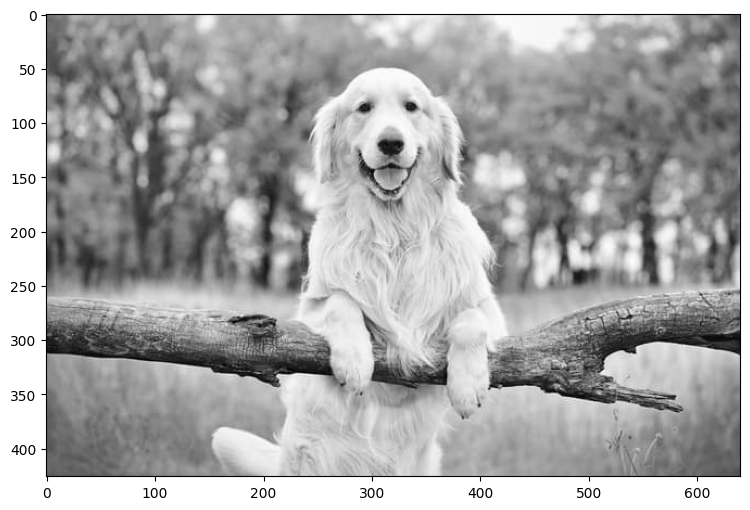

In [ ]:
from PIL import Image
import requests
from io import BytesIO
#Cargamos la imagen original y la convertimos a escala de grises
response = requests.get("https://www.univision.com/_next/image?url=https%3A%2F%2Fst1.uvnimg.com%2F5d%2F99%2Fbe264cbb403bbb51b04bac5a6d9e%2Fgold.jpg&w=640&q=75")
path_imagen = Image.open(BytesIO(response.content))
imagen_grises = path_imagen.convert('LA') #convertir en escala de grises.
plt.figure(figsize=(9, 6))
plt.imshow(imagen_grises);

In [ ]:
 #Convertimos la imagen en escala de grises a una matriz de numpy
# Se extraen los valores de la banda 0 (intensidad de grises) y se convierten a un array de flotantes
imagen_matriz = np.array(list(imagen_grises.getdata(band=0)), float)

# Redimensionamos la matriz para que coincida con las dimensiones originales de la imagen
# Se establece la forma de la matriz en base a la altura y el ancho de la imagen
imagen_matriz.shape = (imagen_grises.size[1], imagen_grises.size[0])

# Imprimimos el tamaño de la matriz resultante (alto x ancho)
print("Tamaño de la matriz: ", imagen_matriz.shape)


Tamaño de la matriz:  (426, 640)


In [ ]:
# Convertimos la matriz a un objeto de tipo matriz de numpy
imagen_matriz = np.matrix(imagen_matriz)
print(imagen_matriz)

[[119. 120. 122. ...  90.  95.  99.]
 [116. 117. 118. ...  89.  95.  99.]
 [112. 112. 113. ...  89.  95.  98.]
 ...
 [ 99.  99.  98. ...  79.  78.  77.]
 [ 95.  94.  92. ...  81.  79.  79.]
 [ 95.  94.  92. ...  81.  79.  79.]]


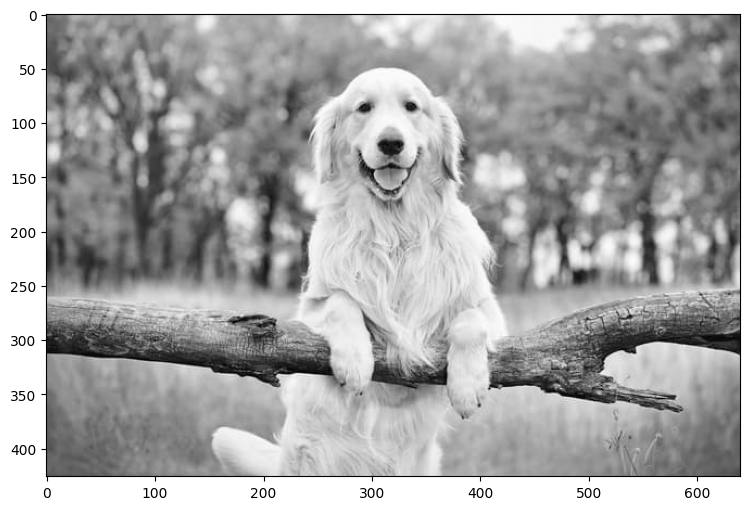

In [ ]:
#Visualizamos la imagen, a partir de la matriz creada
plt.figure(figsize=(9,6))
plt.imshow(imagen_matriz, cmap='gray');

In [ ]:
#Hacemos la SVD de la matriz creada
U, Sigma, VT = svd(imagen_matriz)

In [ ]:
# Imprimimos la matriz U, su tamaño y los primeros valores redoneaos
print("Matriz U:\n", U.shape, "\n", U)

Matriz U:
 (426, 426) 
 [[ 0.05957627  0.02777054 -0.02835394 ...  0.13679732  0.05885276
   0.01540041]
 [ 0.05949024  0.02723248 -0.0278777  ... -0.28919863 -0.06080081
  -0.03544898]
 [ 0.05934198  0.02689264 -0.02705215 ...  0.15337757  0.01126402
   0.00185503]
 ...
 [ 0.04745465  0.04820206  0.00581202 ...  0.00247635 -0.02404843
  -0.00224138]
 [ 0.04692245  0.04741793  0.00961069 ... -0.08845559 -0.06700566
  -0.41881419]
 [ 0.04681356  0.04711541  0.00990247 ...  0.08731209  0.06858135
   0.40618251]]


In [ ]:
# Imprimimos el vector de valores singulares Sigma, su tamaño y los valores redondeados
print("Matriz Sigma: \n",Sigma.shape,"\n",Sigma)

Matriz Sigma: 
 (426,) 
 [8.25220136e+04 8.61499672e+03 8.07801515e+03 6.14199660e+03
 6.07307211e+03 5.37047029e+03 5.03197626e+03 4.42629503e+03
 3.91166514e+03 3.46978303e+03 3.37013106e+03 2.93457605e+03
 2.81070378e+03 2.67156074e+03 2.42211569e+03 2.25394088e+03
 2.22056518e+03 2.02599232e+03 1.92052497e+03 1.87328186e+03
 1.79080662e+03 1.77749044e+03 1.71748583e+03 1.60461714e+03
 1.46029405e+03 1.38887875e+03 1.37585843e+03 1.28177398e+03
 1.23133952e+03 1.19943080e+03 1.19151582e+03 1.12528862e+03
 1.09674721e+03 1.08672465e+03 1.04125843e+03 1.02782887e+03
 9.96543252e+02 9.72790931e+02 9.39626269e+02 9.17831715e+02
 8.90111228e+02 8.63906719e+02 8.56644868e+02 8.18542787e+02
 8.02741502e+02 7.67609311e+02 7.48968769e+02 7.34934953e+02
 7.17267517e+02 6.99890817e+02 6.77173062e+02 6.65549114e+02
 6.48899329e+02 6.39932609e+02 6.30681459e+02 6.13300445e+02
 6.00916873e+02 5.95506583e+02 5.80172852e+02 5.72872006e+02
 5.60465798e+02 5.58613536e+02 5.48420329e+02 5.40991183e+02

In [ ]:
# Imprimimos la matriz VT, su tamaño y los primeros valores
print("Matriz VT:\n",VT.shape,"\n",VT)

Matriz VT:
 (640, 640) 
 [[ 0.0284053   0.02840326  0.02862254 ...  0.03019101  0.03071618
   0.03107674]
 [-0.02084126 -0.02191803 -0.02228722 ... -0.06149338 -0.06271091
  -0.06278275]
 [-0.04160044 -0.04114195 -0.04023085 ...  0.01060719  0.01312409
   0.01432776]
 ...
 [ 0.00832572  0.00076651  0.0134276  ...  0.50331166 -0.13788007
  -0.12635208]
 [ 0.02355327 -0.03447767 -0.01616334 ... -0.13229781  0.444693
  -0.22680419]
 [ 0.01709686 -0.03069206  0.03033018 ... -0.0695191  -0.22542638
   0.3138592 ]]


In [ ]:
# Imprimimos la cantidad total de valores singulares de Sigma
print("Total de valores singulares de Sigma:",Sigma.shape)

Total de valores singulares de Sigma: (426,)


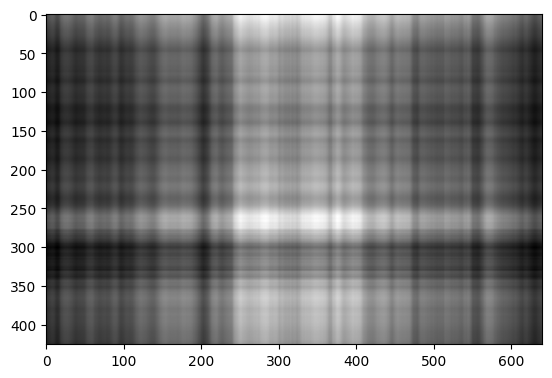

In [ ]:
#Reconstruimos la imagen original: usando la 1ra columna de U, la 1era fila de VT y el 1er valor singular
imagen_reconstruida = np.matrix(U[:, :1]) * np.diag(Sigma[:1]) * np.matrix(VT[:1, :])
plt.imshow(imagen_reconstruida, cmap='gray');

Entre menor número de valores singulares, la imagen puede ser poco nítida. Recordemos, los valores singulares más pequeños (Sigma) provienen de las partes de la imagen con menor interés.

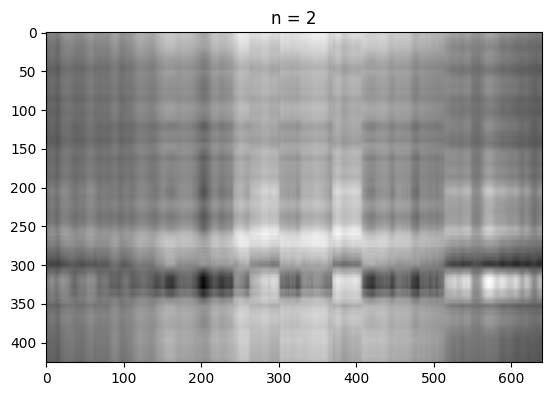

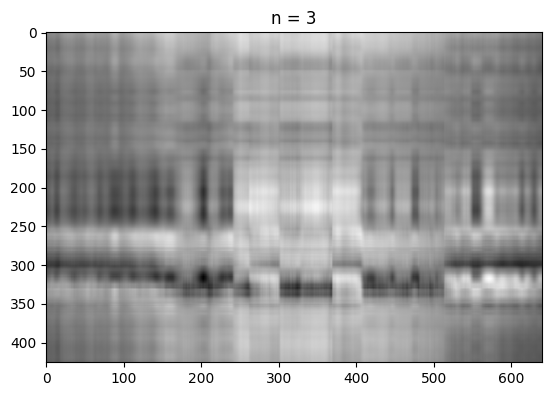

In [ ]:
#Exploramos usando la 2da y 3ras columnas de U, filas de VT y valores singulares
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(Sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

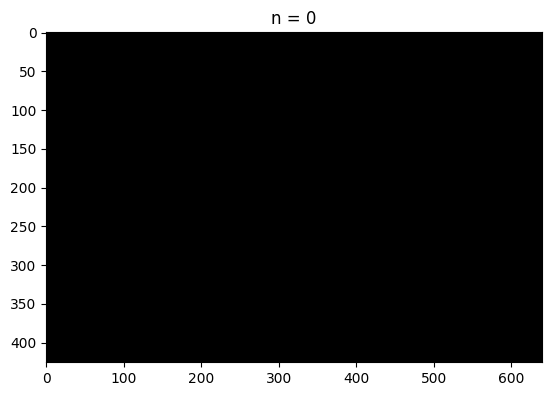

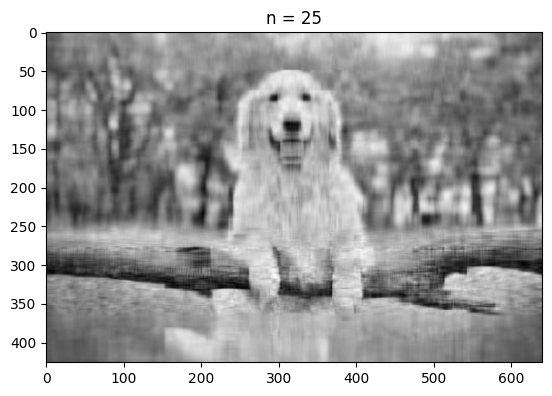

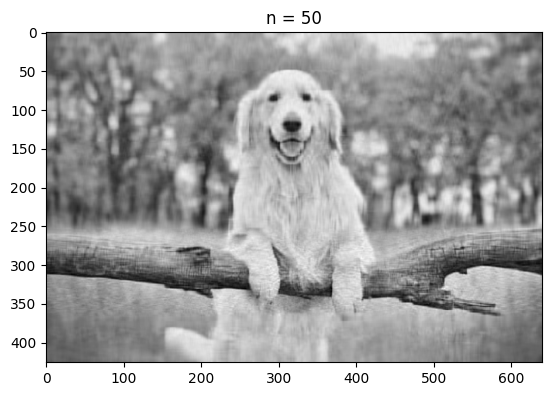

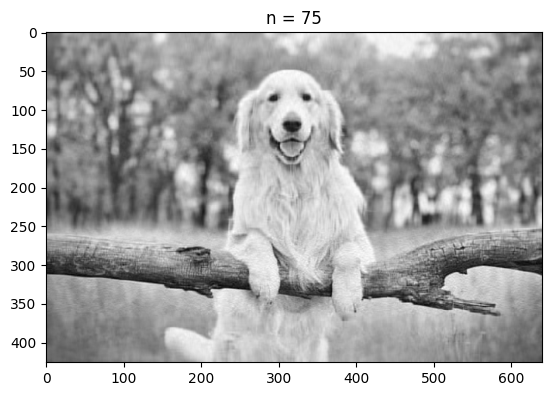

In [ ]:
#Generamos un ciclo para reconstruir la imagen utilizando n vectores.
for i in range(0, 100, 25):
    reconstimg = np.matrix(U[:, :i]) * np.diag(Sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [ ]:
# Calculamos la relación de compresión de la imagen usando la fórmula r = (n+m)k/nm
# Donde n y m son las dimensiones de la imagen, y k es el número de vectores singulares usados
r = (imagen_matriz.shape[0]+imagen_matriz.shape[1])*75 /(imagen_matriz.shape[0]*imagen_matriz.shape[1])*100
print("% de la información original usado en la reconstrucción: {:.2f}".format(r))

% de la información original usado en la reconstrucción: 29.32


### Ejercicio 2: reconstrucción de una imagen usando k vectores

El siguiente ejemplo, realiza la descomposición de matriz dada una imagen y la reconstruyendo usando K vectores.
[Fuente](https://github.com/rameshputalapattu/jupyterexplore/blob/master/jupyter_interactive_environment_exploration.ipynb)

In [ ]:
#Carga de bibliotecas
from numpy.linalg import svd
from ipywidgets import interact,interactive,interact_manual
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

#Carga de imágenes
#skimage tiene un modulo llamado data que tiene disponible imagenes para exploración.
#Vamos a leer algunas imagenes
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [ ]:
#Realiza la SVD y a partir esta realiza la reconstrucción de una matriz
def calculo_svd(image,k):
    U,S,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
    #Matriz reconstruida y matriz de valores singulares
    return reconst_matrix,S

#Reconstrucción de la imagen en escala de grises
def compress_show_gray_images(img_name,k):
    """
    Comprime las imágenes en escala de grises y muestra la imagen reconstruida.
    También muestra un gráfico de valores singulares
    """
    image=gray_images[img_name]
    original_shape = image.shape
    print("Tamaño de la imagen:", original_shape)
    reconst_img,s = calculo_svd(image,k)
    print("Número de valores sigma:", s.shape)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [ ]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));

interactive(children=(Dropdown(description='img_name', options=('cat', 'coffee'), value='cat'), IntSlider(valu…